In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# load data
df = pd.read_csv("../data/cleaned/cleaned_nigeria_medical_insurance.csv")
df.head()

,age,gender,bmi,children,smoker,state,hospital_bill
0,47,Male,45.30,0.0,Yes,Rivers,12854792.70
1,33,Female,22.70,0.0,No,Kaduna,32976705.91
2,64,Female,39.00,0.0,Yes,Lagos,24127691.00
3,34,Male,33.20,1.0,Yes,Abuja,8392268.25
4,33,Male,30.45,2.0,No,Lagos,7892204.00


In [3]:
# data overview
df.describe()

,age,bmi,children,hospital_bill
count,927.000000,927.000000,927.000000,9.270000e+02
mean,39.364617,30.735653,1.261057,1.958856e+07
std,12.679500,4.950167,1.257730,1.809975e+07
min,18.000000,16.000000,0.000000,1.697260e+06
25%,29.500000,28.800000,0.000000,7.123060e+06
50%,40.000000,30.450000,1.000000,1.389720e+07
75%,49.000000,32.400000,3.000000,2.330503e+07
max,64.000000,53.100000,5.000000,9.565564e+07


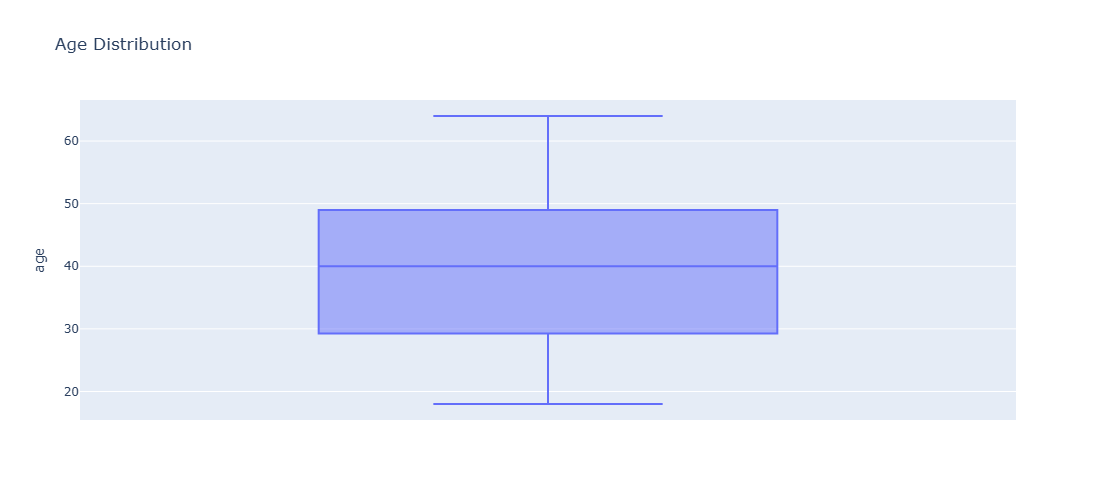

In [17]:
# Univariate Analysis: Distribution of age
px.box(
    df,
    y="age",
    width=500,
    height=500,
    title="Age Distribution"
)

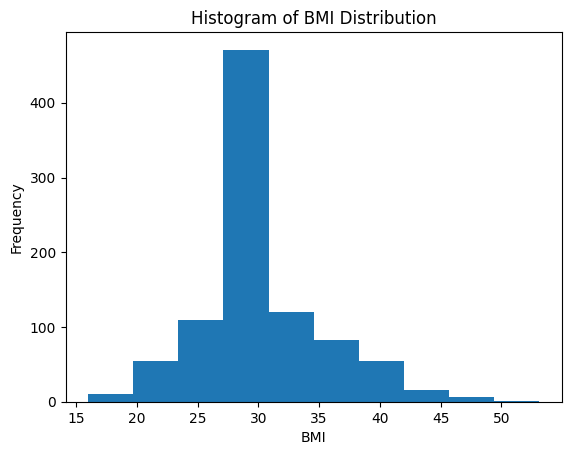

In [5]:
# Univariate Analysis: BMI distribution
plt.hist(df["bmi"], bins=10)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Histogram of BMI Distribution")

plt.show()

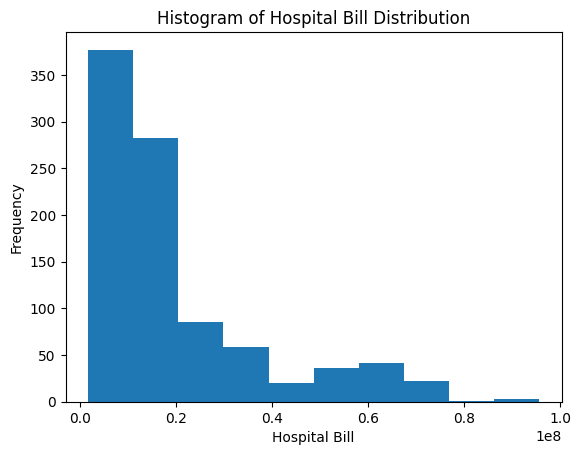

In [6]:
# Univariate Analysis: hospital bill distribution
plt.hist(df["hospital_bill"], bins=10)
plt.xlabel("Hospital Bill")
plt.ylabel("Frequency")
plt.title("Histogram of Hospital Bill Distribution")

plt.show()

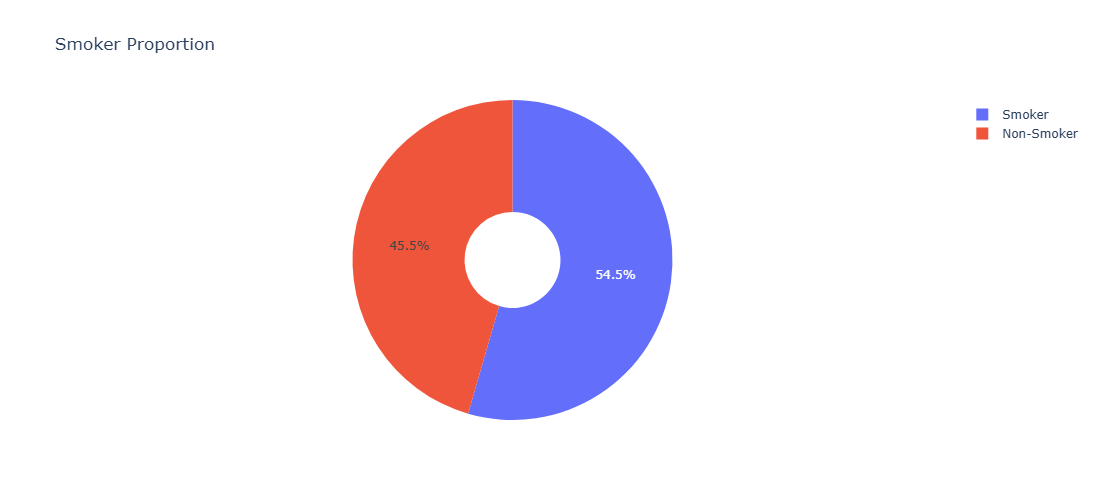

In [7]:
# Univariate Analysis: Smoker Proportion
df["smoker_label"] = df["smoker"].map({
    "Yes": "Smoker",
    "No": "Non-Smoker"
})
fig = px.pie(
    df,
    names="smoker_label",       
    title="Smoker Proportion",
    width=500,
    height=500,                       
    hole=0.3
)
fig.show()

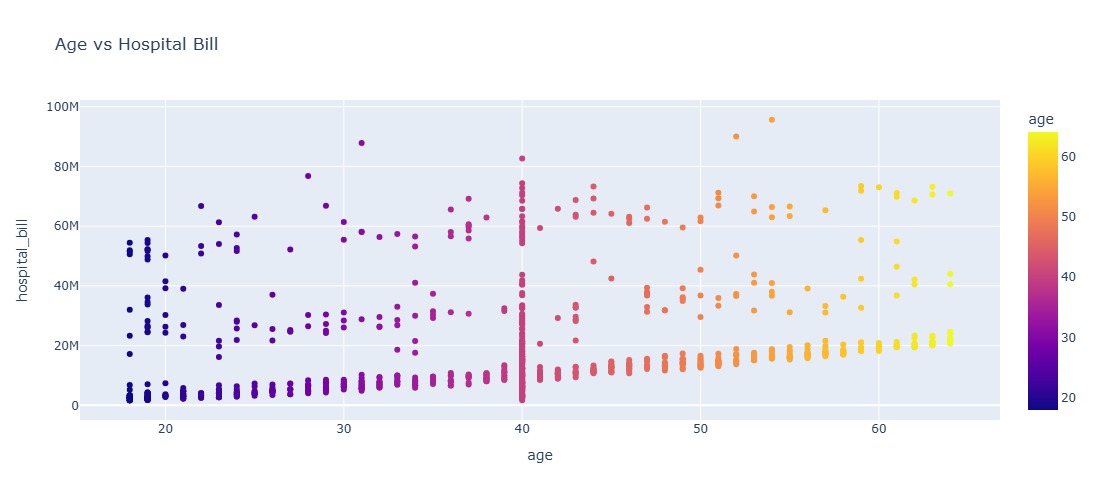

In [8]:
# Bivariate Analysis: Age vs Hospital Bill
fig = px.scatter(
    df,
    x="age",
    y="hospital_bill",
    color="age",
    title="Age vs Hospital Bill",
    width=500,
    height=500                     
)
fig.show()

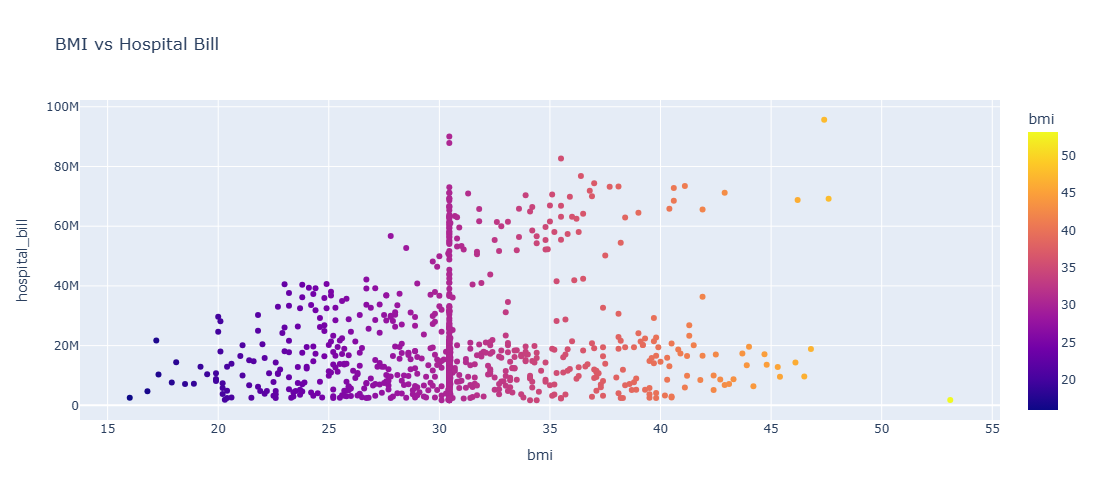

In [9]:
# Bivariate Analysis: BMI vs Hospital Bill
fig = px.scatter(
    df,
    x="bmi",
    y="hospital_bill",
    color="bmi",
    title="BMI vs Hospital Bill",
    width=500,
    height=500                     
)
fig.show()

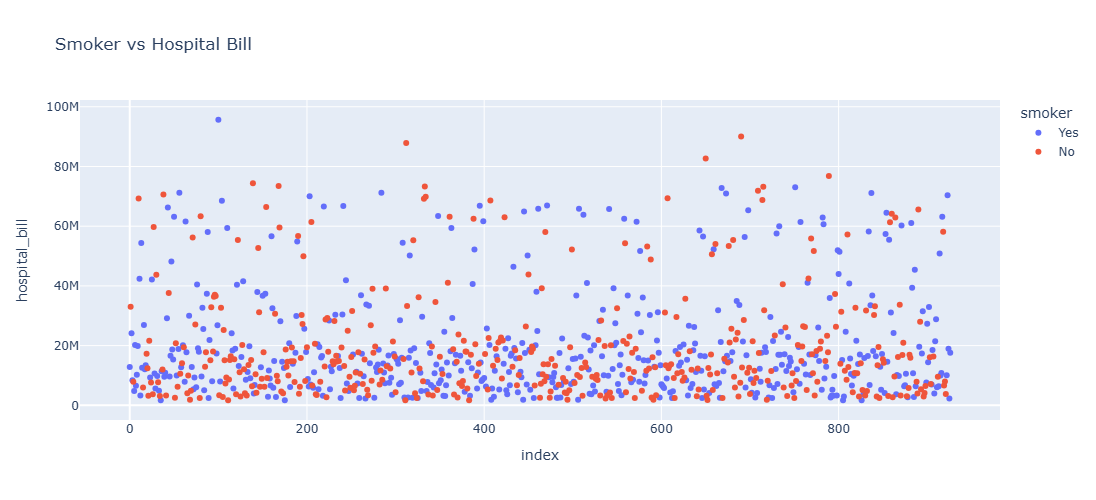

In [20]:
# Bivariate Analysis: smoker vs Hospital Bill
fig = px.scatter(
    df,
    # x="smoker",
    y="hospital_bill",
    color="smoker",
    title="Smoker vs Hospital Bill",
    width=500,
    height=500                     
)
fig.show()

In [23]:
df.groupby("smoker_label")["hospital_bill"].mean().sort_values(ascending=False)

smoker_label
Smoker        1.989072e+07
Non-Smoker    1.922697e+07
Name: hospital_bill, dtype: float64

In [24]:
df.groupby("smoker_label")["hospital_bill"].sum().sort_values(ascending=False)

smoker_label
Smoker        1.004481e+10
Non-Smoker    8.113783e+09
Name: hospital_bill, dtype: float64

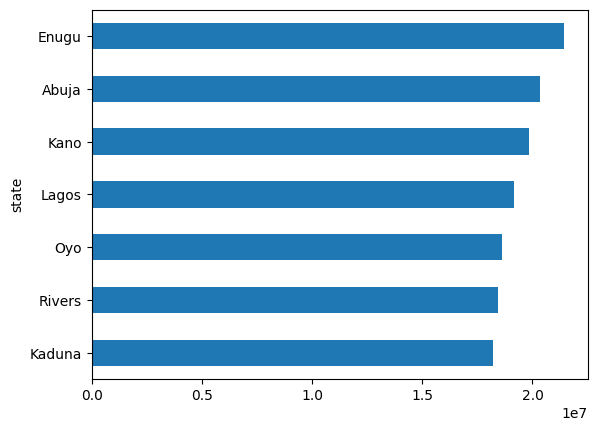

In [11]:
# Bivariate Analysis: state vs Hospital Bill
df.groupby("state")["hospital_bill"].mean().sort_values().plot(kind="barh");

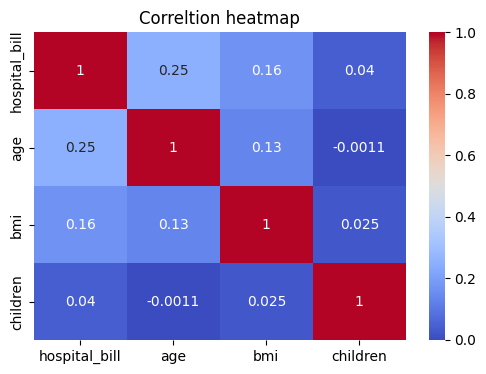

In [13]:
# Multivariate Analysis: Correlation heatmap
corr = df[["hospital_bill", "age", "bmi", "children"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(data=corr, annot=True, cmap="coolwarm")
plt.title("Correltion heatmap")
plt.show()

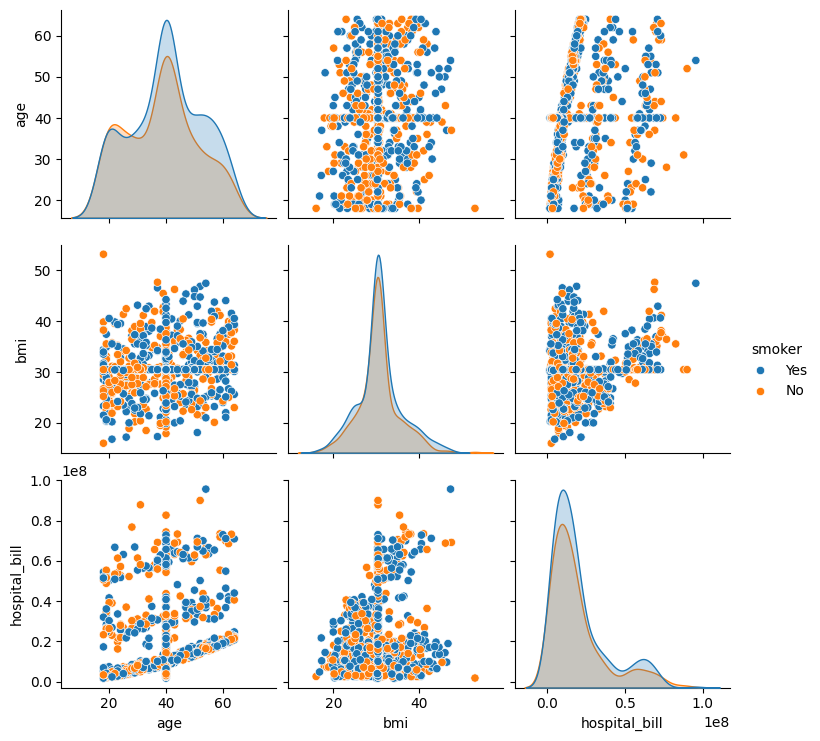

In [14]:
# Multivariate Analysis: Pairplots
cols = ["age", "bmi", "hospital_bill", "smoker"]
sns.pairplot(
    df[cols],
    hue="smoker",
    diag_kind="kde"
)
plt.title("  ")
plt.show()

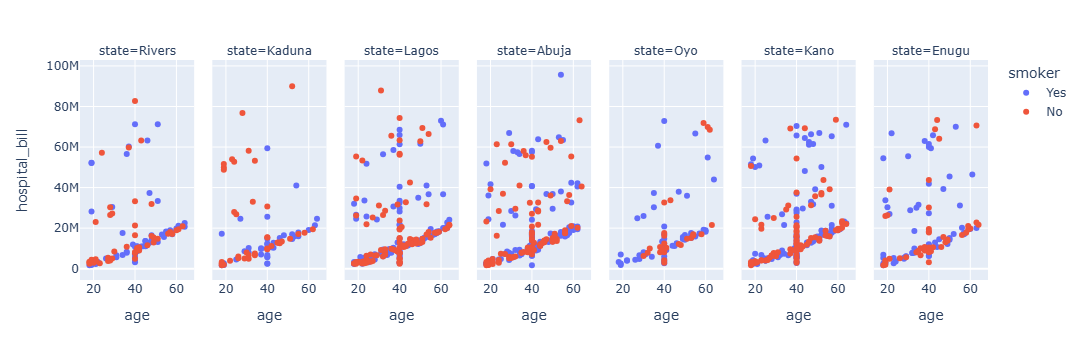

In [19]:
# Multivariate Analysis: feature relationships
fig = px.scatter(
    df,
    x="age",
    y="hospital_bill",
    color="smoker",
    facet_col="state"
    
)
fig.show()

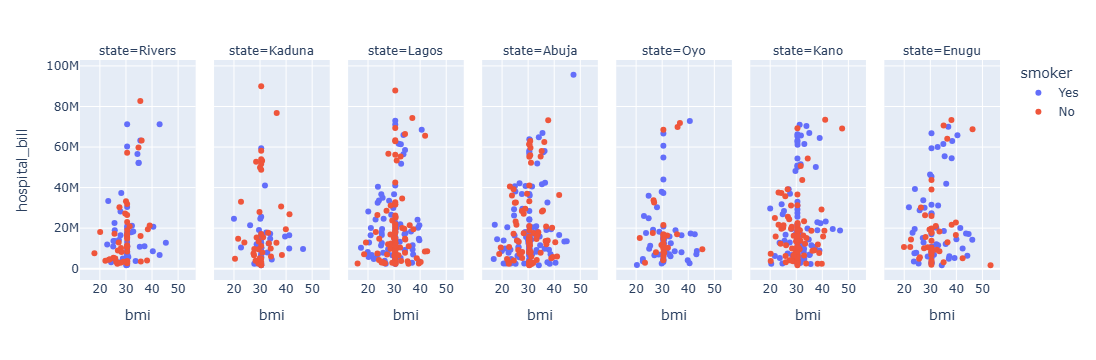

In [25]:
# Multivariate Analysis: feature relationships
fig = px.scatter(
    df,
    x="bmi",
    y="hospital_bill",
    color="smoker",
    facet_col="state"
    
)
fig.show()